# <!-- TITLE --> - TITLE : BUILD YOUR LINEAR REGRESSION MODEL TO PREDICT NON-LINEAR MODELS -
<img width="1500px" heigh="1000px" src="out.png"></img>

#### <!-- AUTHOR --> - Author : __Dr. Amiehe-Essomba__ (c) 2023

## Objectives :
 - We are going to create a __Linear Regression (LR)__ model to predict a non-linear models. For that we'll use \
 the __Mean Squared Error(MSE)__ to compute the cost and loss functions 
 
## Equations : 
  The equation of linear model can be difined as 
  
 ```python
    Yhat = An * X**n + An1 * X*(n-1) +.......+ A1 * X + b
    Yhat = X * A + b
```

  __Where :__

  * __Yhat__ : is the predicted value
  * __A__ : is the slope
  * __b__ : is the bias (explicative values)
  * __X__ : a matrix of dimension (n, m) that contains the features

The __MSE__ equation is :

```python
MSE = (1 / m) * ( (Y - Yhat) ** 2 ).sum( axis = 1)
```

  Where : 

  * __m__ is the number of points 
  * __Yhat__ is the predicted value
  * __Y__ is the True value( target value )

The COST function 

```python
cost = (1 / 2 * m) * ( (Y - Yhat) ** 2 ).sum( axis = 1)
```

## Derivatives 

```ruby
dA = (dcost / dA) 
   = (1 / m) * X.T * (Y - Yhat).sum()

db = (dcos / db)
   = (1 / m) * (Y - Yhat).sum()
```

## Back propagation equations : 
```ruby
A = A - learning_rate + dA
b = b - learning_rate + db
```

## Metrics : 
```python
R = 1 - [ ((Y - Yhat) ** 2).sum(axis=1) / ((Y - Y.mean(axis=1)) ** 2).sum(axis=1) ]
```
more R is closed to 1 better is the model 

## Turning hyperparameters :
 * __learning_rate__
 * __max_iter__ for iterations to reach to the convergence of until the 
 * __epsilon__ for convergence

The gradient becomes smaller and we break the loop when (dgrad < epsilon).\
In this case we'll use while loop to be sure that we reach to the convergence (local minimum is found)

 * shape = X.shape = (n, m)

## Initialization :
```python
params = {'b' : np.zeros((NL, 1)), 'W' : np.zeros((1, n)) }
```

Then after initaliazing parameters we can compute the rest of functions

```python
index, costs = 0, []
while dgrad > epsilon:
    dA, db  = grads['dA'], grads['db']
    cost    =  (1 / 2 * m) * ( (Y - Yhat) ** 2 ).sum( axis = 1)
    costs.append(cost)
    # back propagation 
    params['A'] = params['A'] - learning_rate * dA
    params['b'] = params['b'] - learning_rate * db

    if index == 0: pass 
    else:
        dgrad = costs[index] - costs[index-1]

    index += 1
```

## What we will do here :

 - Creating a new dataset using __make_regression__ from __sklean.dasets__ 
 - Data preprocessing( **cleaning and normalization**)
 - Building our linear model 
 - Training our model
 - Testing our model
 - Computing metrics such as R for evaluating the model performance
 

In [2]:
import numpy as np
from sklearn.datasets import make_classification , make_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as mm

In [3]:
def Model(X : np.ndarray, params : dict = {}):
    """ 
    Y = A.X + b
    Note that :
    A.dim() = [n, 1]
    X.dim() = [m, m]
    b.dim() = [1, ]

    """
    model = X.dot(params['A']) + params['b']
   
    return model


In [4]:
def Params(n: int = 1):
    """ 
    params = (A, b)
    A = slope 
    b = bias
    """
    # random normal for both values 
    A = np.random.randn(n, 1)
    b = np.random.randn(1,1).reshape((-1,))

    return {"A" : A, "b" : b} 



In [5]:
def COST(X : np.ndarray, y : np.ndarray, params : dict = {}):
    """
    COST using here is the MSE (Mean-Squared-Error)
    """ 
    cost = ( (Model(X=X, params=params) - y) ** 2 ).mean(axis=0) / 2.0

    return  cost

In [6]:
def Metrics(X : np.ndarray, y : np.ndarray, params : dict = {}):
    """
    Determination coefficient R
    """
    upper   = ( (Model(X=X, params=params ) - y) ** 2 ).sum(axis=0)
    lower   = ( (y - np.mean(y)) ** 2 ).sum(axis=0)

    R       = 1 - (upper / lower)
    model_eval   = "GOOD" if R > 0.7 else 'WORSE'

    return R[0]


In [7]:
def back_propagation(X : np.ndarray, y : np.ndarray, params : dict = {}):
    grads = {'dA' : None, 'db' : None}
    """
    note that X.dum() = [m, n_features] with n_features = 1 (linear case) number of feature, m is the samples size 
    X.T.dim() = [1, m] and the result of Model() if [m, n_features] that why the summation is on axis = 1 because 
    the final matrix in [m, 1]

    We can see that in the case of db the summation is on axis=0 because the form of matrix does not change [m, n_features]
    """
    grads['dA'] = ( X.T.dot( Model(X=X, params=params) - y )).mean(axis=1).reshape((X.shape[1], 1))
    grads['db'] = ( Model(X=X, params=params) -y ).mean(axis=0)

    return grads

In [8]:
def SGD(X : np.ndarray, y : np.ndarray, params : dict = {}, 
        learning_rate : float = 1e-4, epsilon = 1e-3, print_val : bool=False ):

    cost_history, eval, iter = [], [], 0
 
    while True:
        grads = back_propagation(X = X, y =y, params = params)
        params['A'] = params['A'] - learning_rate * grads['dA']
        params['b'] = params['b'] - learning_rate * grads['db']
        cost        =  COST(X=X, y=y, params=params)
        cost_history.append( cost)

        eval.append( Metrics(X=X, y=y, params=params) )

        if iter < 5 : pass 
        else:
            if np.abs( cost_history[iter] - cost_history[iter-1] ) <= epsilon : 
                print(f"cost function :\n{cost}\nR :\n{eval[-1]}\nnew params :\n{params}\ninteration :\n{iter} ")
                break
            else: pass

        if print_val is True:
            if iter % 10 == 0:
                if cost not in [np.nan]:
                        print(f"cost function : {cost} : interation : {iter} ")
                else: break
            else: pass 
        else: pass 
        
        iter += 1

    cost_history = np.array(cost_history)
    eval = np.array(eval)

    return params , cost_history.reshape((-1, 1))[:iter, : ], eval.reshape((-1, 1))[:iter, : ], iter

In [9]:
def new_dataset(n_features : int = 1):
    # generate the same random number 
    # creating the new dataset 
    x = X = np.linspace(0, 2, 1000)
    # reshape dimensions
    y       = 1/3 * x ** 3 - 3/5 * x ** 2  + 2 + np.random.randn(x.shape[0]) / 20
    y       = y.reshape((-1, 1))
    x       = x.reshape((n_features, -1))
    return x, y

X, y = new_dataset(n_features=1)

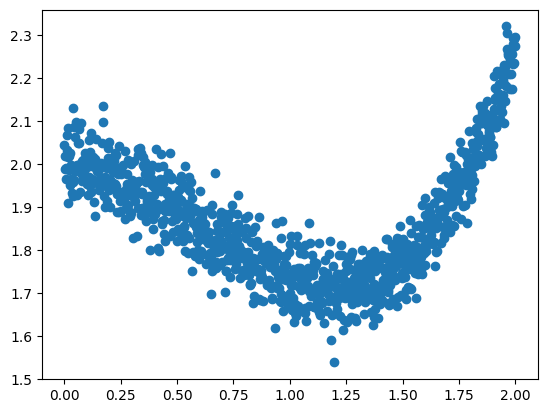

In [18]:
# look at the model bellow we have here a non linear model that we are going the predict 
plt.scatter(X, y)

In [11]:
n_features = 1
# generating samples
X, y    = make_regression(n_samples=500, n_features=n_features, noise=10, random_state=10)
# reshape dimensions
X       = X.reshape((-1, n_features))
y       = y.reshape((-1, 1))

# initialization 
params  = Params(n_features)

# prediction before training the model
yhat_   = Model(X=X, params=params) 

# training and evaluating  the model
params , cost_history, eval, iter= SGD(X=X, y=y, params=params, learning_rate=1e-4, print_val=False, epsilon=1e-4)

# metrics compute
cost_history, eval = cost_history.reshape((-1,)), eval.reshape((-1,))

# prediction 

yhat = Model(X=X, params=params).reshape((-1, ))



cost function :
[47.72542158]
R :
0.9739104121268687
new params :
{'A': array([[63.10403414]]), 'b': array([0.53753378])}
interation :
4252 


In [12]:
#reshape outputs
yhat    = yhat.reshape((-1, ))
yhat_   = yhat_.reshape((-1, 1))
y       = y.reshape((-1, 1))
X       = X.reshape((n_features, -1))

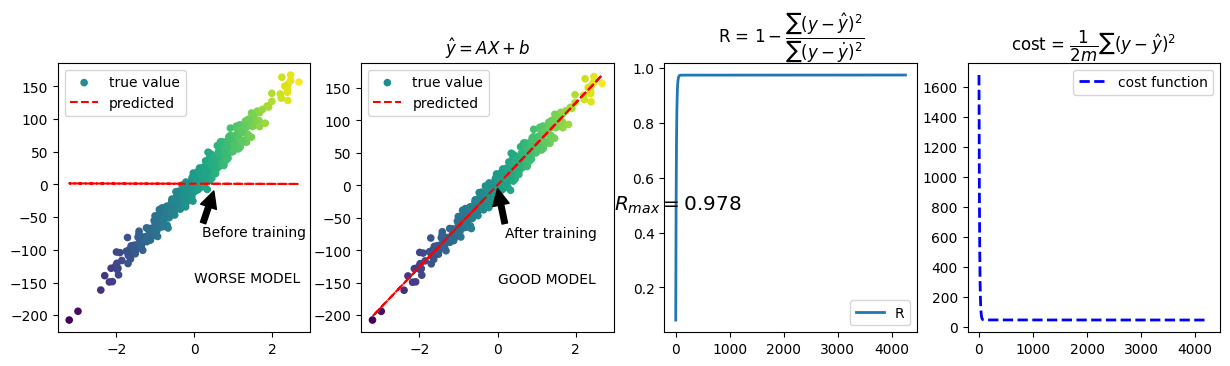

In [13]:
#plotting curves 

fig, axes = plt.subplots(1,4, figsize=(15,3.5))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.scatter(X[0], y.reshape((-1,)), marker='o', c=yhat, s=20, label = "true value")
ax0.plot(X[0], yhat_, ls='--', color='r', label='predicted')

ax1.scatter(X[0], y.reshape((-1,)), marker='o', c=yhat, s=20, label = "true value")
ax1.plot(X[0], yhat, ls='--', color='r', label='predicted')
ax2.plot(eval, lw=2, label='R')
ax3.plot(cost_history, ls="--", lw=2, color='b', label='cost function')
ax2.set_title("R = $1-\dfrac{{\sum (y-\hat{y})^2}}{\sum (y-\dot{y})^2}$")
ax3.set_title("cost = $\dfrac{1}{2m}\sum (y - \hat{y})^2$")
ax1.set_title('$\hat{y} = A X + b$')
ax2.text(40, 0.5, ha='center', va="center", s='$R_{max} = 0.978} $', fontsize='x-large')
ax0.annotate(xy=(0.5,-10.0), text='Before training', xytext=(0.2,-80.0), arrowprops=dict(color="black"))
ax1.annotate(xy=(0.0,-5.0), text='After training', xytext=(0.2,-80.0), arrowprops=dict(color="black"))

ax1.text(0.0, -150.0, s='GOOD MODEL')
ax0.text(0.0, -150.0, s='WORSE MODEL')
ax1.legend()
ax0.legend()
ax2.legend()
ax3.legend()
plt.savefig("out.png")


In [14]:
def model1(X : np.ndarray, y : np.ndarray, 
           learning_rate : float =1e-4, 
           print_val : bool =False, 
           epsilon : float=1e-2, 
           ax : np.ndarray = np.array([]),
           n_features : int = 1):
    """
    Using linear model
    """
    # initialization 
    params  = Params(n_features)
    # training and evaluating  the model
    params , cost_history, eval, iter= SGD(X=X, y=y, params=params, learning_rate=learning_rate, print_val=print_val, epsilon=epsilon)

    yhat = Model(X=X, params=params)

    ax.scatter(X[0], y)
    ax.plot(X[0], yhat, color='r')

    return X, yhat

In [15]:

def model2(X : np.ndarray, y : np.ndarray, 
       learning_rate : float =1e-4, 
       print_val : bool =False, 
       epsilon : float=1e-2, 
       ax : np.ndarray = np.array([]), n_features : int = 2):

       """
       Using polynomial feature witch means that X will be transformed 
       then the initial equation yhat = A.X + b becomes :

       yhat = a1.x** 2 + a2.x + b
       yhat = A.X + b

       but X.dim() = [2, m] with m the number of samples
       b is the bias 
       now we can se that X is a two dimensional array with 2 features.

       This kind of prediction is a multi-linear Regression not a simple linear regression 
       we will in the next why.


       """
       # redim X
       X = X.reshape((-1, 1))

       # initialization 
       params     = Params(n_features)

       # X_array contains (X**2, X)
       X    = np.column_stack((X**2, X)).reshape((n_features, -1))
    
       # training and evaluating  the model
       params , cost_history, eval, iter= SGD(X=X, y=y, params=params, learning_rate=learning_rate, print_val=print_val, epsilon=epsilon)

       yhat = Model(X=X, params=params)
       
       print(X.shape, y.shape, yhat.shape)
       X = X.reshape((n_features, -1))
       ax.scatter(X[0, : ].reshape((-1,)), y.reshape((-1,)))
       ax.plot(X[0, :].reshape((-1,)), yhat.reshape((-1,)), color='r')

       return X, yhat
       


In [16]:
X, y = new_dataset()

ValueError: shapes (1,1000) and (1,1) not aligned: 1000 (dim 1) != 1 (dim 0)

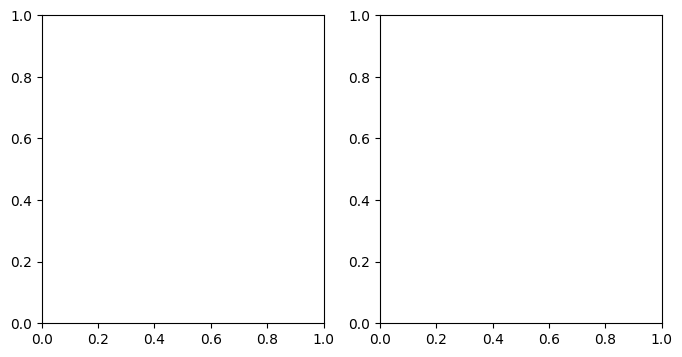

In [17]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
ax1, ax2 = axes.ravel()

X_m1, yhat_m1 = model1(X=X, y=y, learning_rate=1e-3, print_val=False, epsilon=1e-6, ax=ax1)
X_m2, yhat_m2 = model2(X=X, y=y, learning_rate=1e-4, print_val=False, epsilon=1e-2, ax=ax2, n_features=2)